### Análise dos resultados do conjunto de 35k por classe

Análise dos resuntados produzidos pela rede neural do conjunto com 35k amostras para cada classe.

In [36]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import (classification_report, accuracy_score, confusion_matrix, precision_score, 
recall_score)

%run './../../top_k.ipynb'
%run './../../plot_confusion_matrix.ipynb'

%matplotlib inline

In [2]:
random_state = 47
np.random.seed(seed=random_state)

In [3]:
labels = np.load('./label_30k_OnlyTri.npy')

In [4]:
saidas = np.load('./saida_30k_OnlyTri.npy')
saidas = saidas[0,:,0,:]

In [5]:
print(len(labels))
print(len(saidas))

148679
148679


In [6]:
print(labels.dtype)
print(saidas.dtype)

float64
float64


In [7]:
print(labels.shape)
print(saidas.shape)

(148679, 14)
(148679, 14)


In [8]:
labels

array([[ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [9]:
saidas

array([[  1.32217593e-02,   3.24831530e-02,   5.00785783e-02, ...,
          6.14386126e-02,   8.72280374e-02,   4.24244821e-01],
       [  1.98791549e-01,   8.91868323e-02,   3.85190919e-03, ...,
          1.37683116e-02,   4.83725592e-02,   2.41577234e-02],
       [  9.42143597e-05,   8.08133977e-04,   7.22100012e-05, ...,
          4.00737248e-04,   8.78384686e-04,   2.05789576e-04],
       ..., 
       [  9.76213455e-01,   1.22172059e-02,   1.66620023e-03, ...,
          3.20451660e-03,   7.43910437e-04,   1.55248359e-04],
       [  3.54974046e-02,   1.77607566e-01,   1.61512077e-01, ...,
          1.24535106e-01,   6.20456599e-02,   1.79245584e-02],
       [  6.74222503e-03,   6.17859922e-02,   1.96201797e-03, ...,
          1.97757105e-03,   4.90625724e-02,   1.97408162e-03]])

In [10]:
saidas_test = np.copy(saidas)

In [11]:
print(labels[0])
print(saidas[0])
print(saidas[0].argmax())
print('================================')
print(labels[15])
print(saidas[15])
print(saidas[15].argmax())
print('================================')
print(labels[16])
print(saidas[16])
print(saidas[16].argmax())
print('================================')
print(labels[976])
print(saidas[976])
print(saidas[976].argmax())
print('================================')
print(labels[890])
print(saidas[890])
print(saidas[890].argmax())
print('================================')
print(labels[10000])
print(saidas[10000])
print(saidas[10000].argmax())
print('================================')
print(labels[135670])
print(saidas[135670])
print(saidas[135670].argmax())
print('================================')

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
[ 0.01322176  0.03248315  0.05007858  0.05233556  0.05467195  0.07229044
  0.03459746  0.00424479  0.03730391  0.03598392  0.03987703  0.06143861
  0.08722804  0.42424482]
13
[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
[  6.55930126e-05   1.87709782e-04   1.35751443e-05   8.52950942e-03
   3.92942457e-04   9.51394916e-01   7.77552850e-05   3.57188284e-02
   5.68000833e-05   6.35632314e-05   3.05930246e-03   2.69105167e-05
   1.92121064e-04   2.20538612e-04]
5
[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[  9.93157566e-01   7.97594606e-04   5.44136623e-04   1.11134192e-04
   6.16589037e-04   5.01563831e-04   4.33719310e-04   1.69352134e-04
   2.72798527e-04   2.08814890e-04   8.54615064e-05   6.49233989e-04
   8.76636070e-04   1.57542631e-03]
0
[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.00349948  0.02129073  0.26043853  0.19502456  0.10394573  0.01246689
  0.01167894  0.00706137  0.05

In [12]:
for i in range(len(saidas)):
    saidas[i,:] = saidas[i,:] == saidas[i,:].max()

In [13]:
saidas

array([[ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [14]:
print(saidas[0])
print(saidas[0].argmax())
print(saidas[15])
print(saidas[15].argmax())
print(saidas[16])
print(saidas[16].argmax())
print(saidas[976])
print(saidas[976].argmax())
print(saidas[890])
print(saidas[890].argmax())
print(saidas[10000])
print(saidas[10000].argmax())
print(saidas[135670])
print(saidas[135670].argmax())

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
13
[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
5
[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
0
[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
2
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
13
[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
2
[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
6


In [15]:
for i in range(len(saidas)):
    if saidas[i].argmax() != saidas_test[i].argmax():
        print('Diferente: ' + i)

### Classification report

In [16]:
print(classification_report(labels, saidas))

             precision    recall  f1-score   support

          0       0.67      0.65      0.66     10564
          1       0.45      0.40      0.43     10820
          2       0.32      0.44      0.38     10685
          3       0.43      0.45      0.44     10816
          4       0.59      0.58      0.58     10701
          5       0.54      0.51      0.52     10957
          6       0.71      0.56      0.63      8544
          7       0.47      0.42      0.44     10688
          8       0.41      0.38      0.39     10940
          9       0.60      0.61      0.60     10800
         10       0.54      0.41      0.47     10830
         11       0.35      0.49      0.41     10756
         12       0.45      0.42      0.43     10786
         13       0.61      0.59      0.60     10792

avg / total       0.51      0.49      0.50    148679



### Accuracy

In [17]:
print(accuracy_score(labels, saidas))

0.493452336914


### Precision

In [18]:
print(precision_score(labels, saidas, average='micro'))

0.493452336914


### Precision weighted

In [19]:
print(precision_score(labels, saidas, average='weighted'))

0.50560156311


### Top K 

In [20]:
top_k(labels, saidas_test, 3)

72.04917977656562

### Recall

In [21]:
print(recall_score(labels, saidas, average='micro'))

0.493452336914


### Transformando em labels

In [22]:
dict_cat = {
    0: 'Adult',
    1: 'Arts',
    2: 'Business',
    3: 'Computers',
    4: 'Games',
    5: 'Health',
    6: 'Home',
    7: 'Kids',
    8: 'Recreation',
    9: 'Reference',
    10: 'Science',
    11: 'Shopping',
    12: 'Society',
    13: 'Sports'
}

def to_category_name(item):
    return dict_cat[item]

In [23]:
saidas_label = np.zeros(shape=(saidas.shape[0]), dtype='object')
labels_label = np.zeros(shape=(labels.shape[0]), dtype='object')

for i in range(labels.shape[0]):
    saidas_label[i] = to_category_name(saidas[i,:].argmax())
    labels_label[i] = to_category_name(labels[i,:].argmax())

In [24]:
print(saidas_label)
print(labels_label)

['Sports' 'Adult' 'Home' ..., 'Adult' 'Arts' 'Health']
['Sports' 'Recreation' 'Home' ..., 'Adult' 'Reference' 'Computers']


In [25]:
#Validando transformação
pos = 0
print(labels[pos].argmax())
print(labels_label[pos])

print(saidas[pos].argmax())
print(saidas_label[pos])

13
Sports
13
Sports


### Classification report

In [26]:
print(classification_report(labels_label, saidas_label))

             precision    recall  f1-score   support

      Adult       0.67      0.65      0.66     10564
       Arts       0.45      0.40      0.43     10820
   Business       0.32      0.44      0.38     10685
  Computers       0.43      0.45      0.44     10816
      Games       0.59      0.58      0.58     10701
     Health       0.54      0.51      0.52     10957
       Home       0.71      0.56      0.63      8544
       Kids       0.47      0.42      0.44     10688
 Recreation       0.41      0.38      0.39     10940
  Reference       0.60      0.61      0.60     10800
    Science       0.54      0.41      0.47     10830
   Shopping       0.35      0.49      0.41     10756
    Society       0.45      0.42      0.43     10786
     Sports       0.61      0.59      0.60     10792

avg / total       0.51      0.49      0.50    148679



### Accuracy

In [27]:
print(accuracy_score(labels_label, saidas_label))

0.493452336914


### Precision weighted

In [28]:
print(precision_score(labels_label, saidas_label, average='weighted'))

0.50560156311


### Precisão exata por classe

In [29]:
print(precision_score(labels_label, saidas_label, average=None))

[ 0.67287079  0.45097837  0.32471795  0.42575889  0.58630189  0.53642065
  0.71035503  0.46677655  0.4056725   0.60172921  0.54193939  0.34829313
  0.44654581  0.60522085]


### Recall exato por classe

In [31]:
print(recall_score(labels_label, saidas_label, average=None))

[ 0.65363499  0.40471349  0.44445484  0.45386464  0.57676853  0.50743817
  0.56203184  0.42393338  0.37522852  0.60574074  0.41283472  0.49135366
  0.42249212  0.59293921]


### Confusion Matrix

In [32]:
class_counts = np.unique(labels_label, return_counts=True)
class_counts

(array(['Adult', 'Arts', 'Business', 'Computers', 'Games', 'Health', 'Home',
        'Kids', 'Recreation', 'Reference', 'Science', 'Shopping', 'Society',
        'Sports'], dtype=object),
 array([10564, 10820, 10685, 10816, 10701, 10957,  8544, 10688, 10940,
        10800, 10830, 10756, 10786, 10792]))

In [33]:
class_names = ['Adult', 'Arts', 'Business', 'Computers', 'Games', 'Health', 'Home',
        'Kids', 'Recreation', 'Reference', 'Science', 'Shopping', 'Society',
        'Sports']

In [34]:
cm = confusion_matrix(labels_label, saidas_label)

Confusion matrix, without normalization
[[6905  377  595  360  191  160   79  399  285   61   58  731  170  193]
 [ 414 4379  677  502  549  329  185  581  588  315  280 1049  616  356]
 [ 314  296 4749 1073  135  380  119  208  509  168  219 1953  223  339]
 [ 286  312 1652 4909  332  325   99  316  348  347  414  955  325  196]
 [ 218  506  404  591 6172  188   99  888  375  109  138  456  248  309]
 [ 172  296  786  440  195 5560  236  253  386  514  402  646  782  289]
 [ 142  331  390  299  165  344 4802  198  346  150  243  594  350  190]
 [ 404  599  314  355 1291  316  158 4531  641  353  608  294  532  292]
 [ 333  581  851  506  428  450  225  525 4105  247  250 1180  614  645]
 [ 126  230  454  430  104  465  118  316  266 6542  573  328  577  271]
 [ 187  317  857  744  171  539  182  687  368 1088 4471  389  611  219]
 [ 316  451 1747  553  212  303  188  138  657   93   79 5285  201  533]
 [ 249  684  609  473  296  726  213  464  579  629  407  558 4557  342]
 [ 196  351

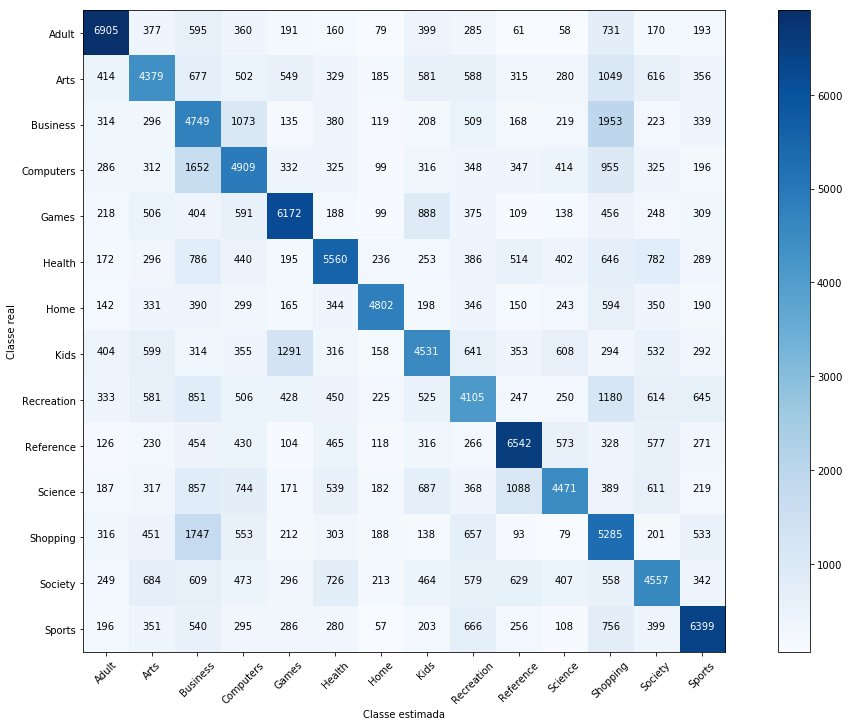

In [38]:
plt.figure(figsize=(6*2.5,4*2.5))
plot_confusion_matrix(cm, classes=class_names,
                      title='')